In [1]:
import pandas as pd
import numpy as np
from pydataset import data
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import viz

In [2]:
df = data('tips')

In [3]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
df['yhat_baseline'] = df['tip'].mean()
df.head(3)

,total_bill,tip,sex,smoker,day,time,size,yhat_baseline
1,16.99,1.01,Female,No,Sun,Dinner,2,2.998279
2,10.34,1.66,Male,No,Sun,Dinner,3,2.998279
3,21.01,3.50,Male,No,Sun,Dinner,3,2.998279


In [5]:
from statsmodels.formula.api import ols
model = ols('tip ~ total_bill', data=df).fit()
df['yhat'] = model.predict(df.total_bill)

In [6]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,yhat_baseline,yhat
1,16.99,1.01,Female,No,Sun,Dinner,2,2.998279,2.704636
2,10.34,1.66,Male,No,Sun,Dinner,3,2.998279,2.006223
3,21.01,3.50,Male,No,Sun,Dinner,3,2.998279,3.126835
4,23.68,3.31,Male,No,Sun,Dinner,2,2.998279,3.407250
5,24.59,3.61,Female,No,Sun,Dinner,4,2.998279,3.502822


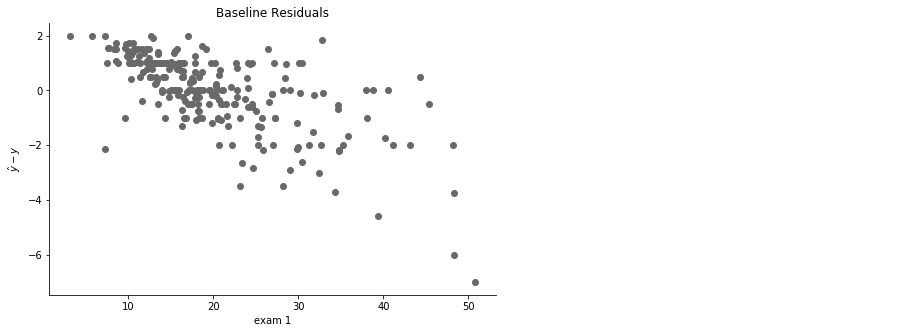

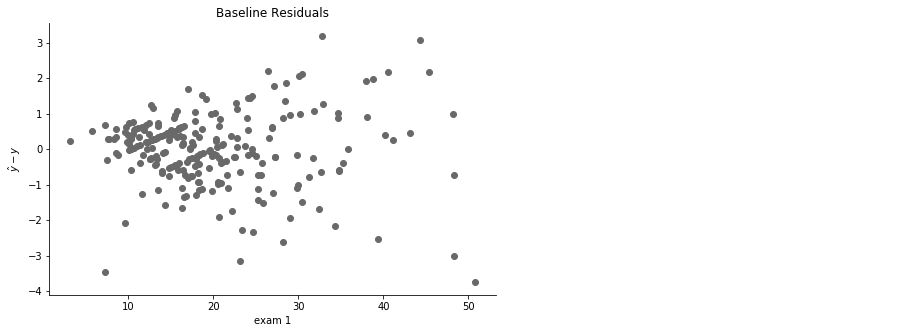

In [27]:
viz.evaluation_example5(df, df.total_bill, df.residual_baseline)
viz.evaluation_example5(df, df.total_bill, df.residual)

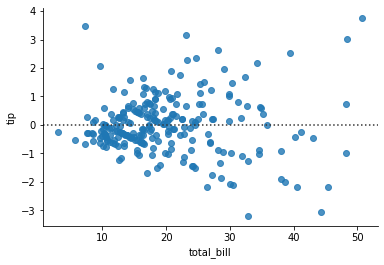

In [107]:
plot_residuals(df.total_bill, df.tip)

In [7]:
from scipy import stats
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [8]:
df['residual'] = df['yhat'] - df['tip']
df['residual_baseline'] = df['yhat_baseline'] - df['tip']

In [9]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,yhat_baseline,yhat,residual,residual_baseline
1,16.99,1.01,Female,No,Sun,Dinner,2,2.998279,2.704636,1.694636,1.988279
2,10.34,1.66,Male,No,Sun,Dinner,3,2.998279,2.006223,0.346223,1.338279
3,21.01,3.50,Male,No,Sun,Dinner,3,2.998279,3.126835,-0.373165,-0.501721
4,23.68,3.31,Male,No,Sun,Dinner,2,2.998279,3.407250,0.097250,-0.311721
5,24.59,3.61,Female,No,Sun,Dinner,4,2.998279,3.502822,-0.107178,-0.611721


In [10]:
df['residual^2'] = df.residual ** 2

df['residual_baseline^2'] = df.residual_baseline ** 2

df.head(3)

,total_bill,tip,sex,smoker,day,time,size,yhat_baseline,yhat,residual,residual_baseline,residual^2,residual_baseline^2
1,16.99,1.01,Female,No,Sun,Dinner,2,2.998279,2.704636,1.694636,1.988279,2.871792,3.953252
2,10.34,1.66,Male,No,Sun,Dinner,3,2.998279,2.006223,0.346223,1.338279,0.119870,1.790990
3,21.01,3.50,Male,No,Sun,Dinner,3,2.998279,3.126835,-0.373165,-0.501721,0.139252,0.251724


In [17]:
SSE = sum(df['residual^2'])
SSE_baseline = sum(df['residual_baseline^2'])

print("SSE = ", SSE)
print("SSE_baseline = ", SSE_baseline)

SSE =  252.78874385077603
SSE_baseline =  465.21247704918085


In [12]:
MSE = SSE/len(df)
MSE_baseline = SSE_baseline/len(df)

print("MSE = ", MSE)
print("MSE baseline = ", MSE_baseline)


MSE =  1.036019442011377
MSE baseline =  1.9066085124966428


In [13]:
RMSE = sqrt(MSE)
RMSE_baseline = sqrt(MSE_baseline)

print("RMSE = ", RMSE)
print("RMSE baseline = ", RMSE_baseline)

RMSE =  1.0178504025697377
RMSE baseline =  1.3807999538298958


In [19]:
ESS = sum((df.yhat - df.tip.mean())**2)

In [20]:
ESS

212.4237331984042

In [22]:
TSS = ESS + SSE
TSS

465.2124770491802

In [24]:
diff = RMSE - RMSE_baseline
diff

-0.36294955126015815

In [25]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     203.4
Date:                Thu, 02 Apr 2020   Prob (F-statistic):           6.69e-34
Time:                        23:17:17   Log-Likelihood:                -350.54
No. Observations:                 244   AIC:                             705.1
Df Residuals:                     242   BIC:                             712.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9203      0.160      5.761      0.000       0.606       1.235
total_bill     0.1050      0.007     14.260      0.000       0.091       0.120
==============================================================================
Omnibus:                       20.185   Durbin-Watson:                   2.151
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.750
Skew:                           0.443   Prob(JB):                     6.35e-09
Kurtosis:                       4.711   Cond. No.                         53.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
df

,total_bill,tip,sex,smoker,day,time,size,yhat_baseline,yhat,residual,residual_baseline,residual^2,residual_baseline^2
1,16.99,1.01,Female,No,Sun,Dinner,2,2.998279,2.704636,1.694636,1.988279,2.871792,3.953252
2,10.34,1.66,Male,No,Sun,Dinner,3,2.998279,2.006223,0.346223,1.338279,0.119870,1.790990
3,21.01,3.50,Male,No,Sun,Dinner,3,2.998279,3.126835,-0.373165,-0.501721,0.139252,0.251724
4,23.68,3.31,Male,No,Sun,Dinner,2,2.998279,3.407250,0.097250,-0.311721,0.009458,0.097170
5,24.59,3.61,Female,No,Sun,Dinner,4,2.998279,3.502822,-0.107178,-0.611721,0.011487,0.374203
...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,29.03,5.92,Male,No,Sat,Dinner,3,2.998279,3.969131,-1.950869,-2.921721,3.805888,8.536455
241,27.18,2.00,Female,Yes,Sat,Dinner,2,2.998279,3.774836,1.774836,0.998279,3.150043,0.996560
242,22.67,2.00,Male,Yes,Sat,Dinner,2,2.998279,3.301175,1.301175,0.998279,1.693057,0.996560
243,17.82,1.75,Male,No,Sat,Dinner,2,2.998279,2.791807,1.041807,1.248279,1.085361,1.558200


In [35]:
def plot_residuals(df.tip, df.yhat):
    return sns.residplot(df.residual, df.tip)

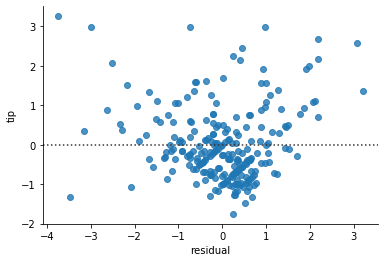

In [39]:
plot_residuals(df.tip, df.yhat)

In [40]:
from sklearn.metrics import mean_squared_error

In [108]:
SSE2 = mean_squared_error(df.tip, df.yhat)*len(df)
SSE2_baseline = mean_squared_error(df.tip, df.yhat_baseline)*len(df)

print("SSE manual == SSE sklearn: ", SSE == SSE2) 
print("SSE manual - baseline == SSE sklearn - baseline: ", SSE_baseline == SSE2_baseline) 
SSE2
SSE2_baseline

SSE manual == SSE sklearn:  False
SSE manual - baseline == SSE sklearn - baseline:  False


465.2124770491804

In [109]:
MSE2 = mean_squared_error(df.tip, df.yhat)

MSE2_baseline = mean_squared_error(df.tip, df.yhat_baseline)

print("MSE manual == MSE sklearn: ", MSE == MSE2) 
print("MSE manual_baseline == MSE sklearn - baseline: ", MSE_baseline == MSE2_baseline) 

MSE manual == MSE sklearn:  False
MSE manual_baseline == MSE sklearn - baseline:  False


In [110]:
RMSE2 = sqrt(mean_squared_error(df.tip, df.yhat))
RMSE2_baseline = sqrt(mean_squared_error(df.tip, df.yhat_baseline))

print("RMSE manual == RMSE skearn: ", RMSE == RMSE2) 
print("RMSE manual - baseline == RMSE skearn - baseline: ", RMSE_baseline == RMSE2_baseline) 

RMSE manual == RMSE skearn:  False
RMSE manual - baseline == RMSE skearn - baseline:  False


In [111]:
df_eval = pd.DataFrame(np.array(['SSE','MSE','RMSE']), columns=['metric'])
df_baseline_eval = pd.DataFrame(np.array(['SSE_baseline','MSE_baseline','RMSE_baseline']), columns=['metric'])

df_eval['model_error'] = np.array([SSE, MSE, RMSE])
df_baseline_eval['model_error'] = np.array([SSE_baseline, MSE_baseline, RMSE_baseline])

print(df_eval)
print(df_baseline_eval)

  metric  model_error
0    SSE  3413.829009
1    MSE    14.589013
2   RMSE     3.819557
          metric  model_error
0   SSE_baseline   465.212477
1   MSE_baseline     1.906609
2  RMSE_baseline     1.380800


In [49]:
df_eval['error_delta'] = df_eval.model_error - df_baseline_eval.model_error
df_eval

,metric,model_error,error_delta
0,SSE,252.788744,-212.423733
1,MSE,1.036019,-0.870589
2,RMSE,1.017850,-0.362950


KeyError: 'y'

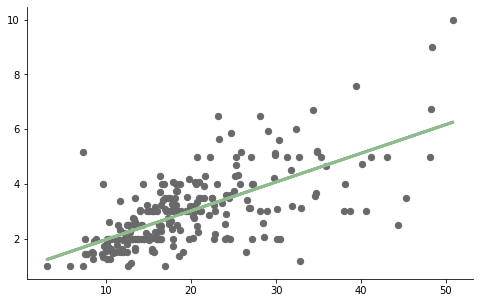

In [112]:
yhat = df.yhat
x = df.total_bill
y = df.tip
viz.evaluation_example3(df, x, y, yhat)

In [56]:
r2 = model.rsquared
print('R-squared = ', round(r2,3))

R-squared =  0.457


In [60]:
y = df.tip
evs = explained_variance_score(y, df.yhat)
print('Explained Variance = ', round(evs,3))

Explained Variance =  0.457


In [61]:
f_pval = model.f_pvalue

print("p-value for model significance = ", round(f_pval,4))

p-value for model significance =  0.0


If less than 0.05, you're OK => conclude that your regression model fits the data better than the model with no independent variables, meaning the independent variables in your model improve the fit.

In [62]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     203.4
Date:                Fri, 03 Apr 2020   Prob (F-statistic):           6.69e-34
Time:                        10:56:04   Log-Likelihood:                -350.54
No. Observations:                 244   AIC:                             705.1
Df Residuals:                     242   BIC:                             712.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9203      0.160      5.761      0.000       0.606       1.235
total_bill     0.1050      0.007     14.260      0.000       0.091       0.120
==============================================================================
Omnibus:                       20.185   Durbin-Watson:                   2.151
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.750
Skew:                           0.443   Prob(JB):                     6.35e-09
Kurtosis:                       4.711   Cond. No.                         53.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [79]:
mpg = data('mpg')

In [80]:
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [82]:
# x = displ
# y = hwy
from statsmodels.formula.api import ols
model = ols('hwy ~ displ', data=mpg).fit()
mpg['yhat'] = model.predict(mpg.displ)

In [84]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,yhat
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,29.342591
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,29.342591
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,28.636473
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,28.636473
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,25.812002


In [87]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    hwy   R-squared:                       0.587
Model:                            OLS   Adj. R-squared:                  0.585
Method:                 Least Squares   F-statistic:                     329.5
Date:                Fri, 03 Apr 2020   Prob (F-statistic):           2.04e-46
Time:                        11:06:36   Log-Likelihood:                -645.62
No. Observations:                 234   AIC:                             1295.
Df Residuals:                     232   BIC:                             1302.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     35.6977      0.720     49.555      0.000      34.278      37.117
displ         -3.5306      0.195    -18.151      0.000      -3.914      -3.147
==============================================================================
Omnibus:                       45.280   Durbin-Watson:                   0.954
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               90.192
Skew:                           0.961   Prob(JB):                     2.60e-20
Kurtosis:                       5.357   Cond. No.                         11.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [89]:
SSE = mean_squared_error(mpg.hwy, mpg.yhat)*len(mpg)
SSE

3413.829008995466

In [90]:
MSE = mean_squared_error(mpg.hwy, mpg.yhat)
MSE

14.589012858954984

In [92]:
RMSE = sqrt(MSE)
RMSE

3.819556631201452

In [93]:
mpg['yhat_baseline'] = mpg['hwy'].mean()
mpg.head(3)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,yhat,yhat_baseline
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,29.342591,23.440171
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,29.342591,23.440171
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,28.636473,23.440171


In [113]:
def plot_residuals(x, y):
    '''
    Plots the residuals of a model that uses x to predict y. Note that we don't
    need to make any predictions ourselves here, seaborn will create the model
    and predictions for us under the hood with the `residplot` function.
    '''
    return sns.residplot(x, y)


In [94]:
def regression_errors(y, yhat):
    '''
    Returns a dictionary containing various regression error metrics.
    '''
    n = y.size
    residuals = yhat - y
    ybar = y.mean()

    sse = sum(residuals**2)

    ess = ((yhat - ybar)**2).sum()

    return {
        'sse': sse,
        'mse': sse / n,
        'rmse': sqrt(sse / n),
        'ess': ess,
        'tss': ess + sse,
    }


In [95]:
y = mpg.hwy
yhat = mpg.yhat
regression_errors(y, yhat)

{'sse': 3413.829008995462,
 'mse': 14.589012858954966,
 'rmse': 3.8195566312014497,
 'ess': 4847.833384166934,
 'tss': 8261.662393162396}

In [96]:
def baseline_mean_errors(y):
    '''
    Returns a dictionary containing various regression error metrics for a
    baseline model, that is, a model that uses the mean of y as the prediction.
    '''
    yhat = y.mean()
    n = y.size
    residuals = yhat - y

    sse = sum(residuals**2)

    return {
        'sse': sse,
        'mse': sse / n,
        'rmse': sqrt(sse / n),
    }

In [97]:
baseline_mean_errors(y)

{'sse': 8261.662393162384, 'mse': 35.30624954342899, 'rmse': 5.941906221359353}

In [98]:
def better_than_baseline(y, yhat):
    '''
    Given the actual and predicted values, returns a boolean value indicating if
    the model's predictions are better than the baseline model.
    '''
    sse_baseline = baseline_mean_errors(y)['sse']
    sse_model = regression_errors(y, yhat)['sse']
    return sse_model < sse_baseline

In [99]:
better_than_baseline(y, yhat)

True

In [100]:
def model_significance(model):
    '''
    Given a fitted OLS model from statsmodels, return the model's expanied
    variance, and the p-value indicating whether the relationship is
    significant.
    '''
    return {'r^2': model.rsquared, 'f p-value': model.f_pvalue}

In [101]:
model_significance(model)

{'r^2': 0.5867866723989039, 'f p-value': 2.0389744555910457e-46}

In [102]:
def plot_residuals(x, y):
    '''
    Plots the residuals of a model that uses x to predict y. Note that we don't
    need to make any predictions ourselves here, seaborn will create the model
    and predictions for us under the hood with the `residplot` function.
    '''
    return sns.residplot(x, y)

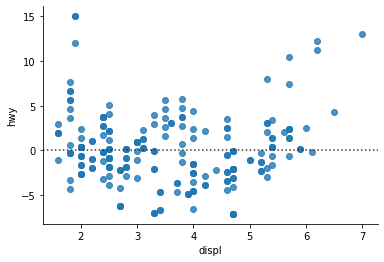

In [104]:
x = mpg.displ
plot_residuals(x, y)

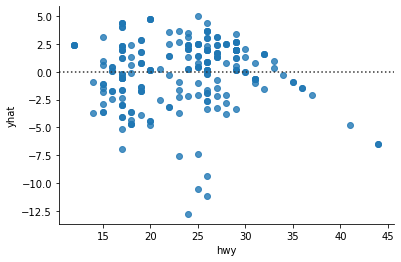

In [105]:
plot_residuals(y, yhat)